## Experiment 1 - Imgenet using Keras

In [36]:

import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.layers import Dropout 
from keras.utils import np_utils 
from keras.layers import Flatten
from keras.layers import Dense 
from keras.constraints import maxnorm
from keras.optimizers import Adam

# Loading dataset

In [3]:
def get_annotations_map():
    valAnnotationsPath = 'C:/Users/parag/Downloads/tiny-imagenet-200/val/val_annotations.txt'
    valAnnotationsFile = open(valAnnotationsPath, 'r')
    valAnnotationsContents = valAnnotationsFile.read()
    valAnnotations = {}

    for line in valAnnotationsContents.splitlines():
        pieces = line.strip().split()
        valAnnotations[pieces[0]] = pieces[1]

    return valAnnotations

### Loading training and testing images

Loading 200 classes
loading training images...
finished loading training images
loading test images...
finished loading test images
0
0
1
1


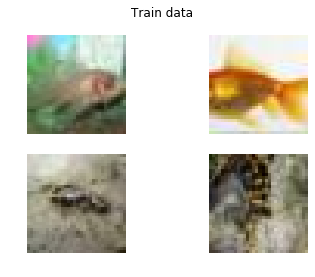

107
175
192
192


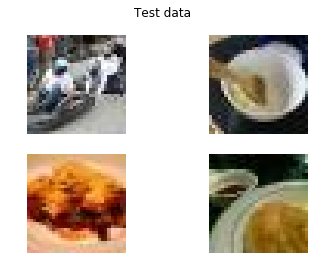

In [7]:


def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,3,32,32],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')
    
    print('loading training images...');
    trainPath=path+'/train'

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,3,32,32],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    valPath=path+ '/val/images'
    for sChild in os.listdir(valPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(valPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(2,0,1))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass


    print('finished loading test images')#+str(i)

    return X_train,y_train,X_test,y_test

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    path=r'C:/Users/parag/Downloads/tiny-imagenet-200'
    X_train,y_train,X_test,y_test=load_images(path,200)#input data path & numbers of classes
    

    fig1 = plt.figure()
    fig1.suptitle('Train data')
    ax1 = fig1.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_train[0],(1,2,0)))
    print(y_train[0])
    ax2 = fig1.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_train[499],(1,2,0)))
    print(y_train[499])
    ax3 = fig1.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_train[500],(1,2,0)))
    print(y_train[500])
    ax4 = fig1.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_train[999],(1,2,0)))
    print(y_train[999])

    plt.show()

    fig2 = plt.figure()
    fig2.suptitle('Test data')
    ax1 = fig2.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_test[0],(1,2,0)))
    print(y_test[0])
    ax2 = fig2.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_test[49],(1,2,0)))
    print(y_test[49])
    ax3 = fig2.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_test[50],(1,2,0)))
    print(y_test[50])
    ax4 = fig2.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_test[99],(1,2,0)))
    print(y_test[99])
    
    plt.show()

In [8]:
X_train.shape

(100000, 3, 32, 32)

In [9]:
y_train.shape

(100000,)

# Model

In [10]:
# normalize inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [11]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [24]:

# Create the model 
model = Sequential() 
model.add(Conv2D(32, (7, 7), input_shape=(3, 32, 32), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (7, 7), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(3, 3)))  
model.add(Conv2D(64, (7, 7), activation='relu', padding='same')) 
model.add(Flatten()) 
model.add(Dropout(0.25))  
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))

In [74]:
# Create the model 
model = Sequential() 
model.add(Conv2D(16, (5, 5), input_shape=(3, 32, 32), activation='relu', padding='same')) 
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dense(128, activation='elu')) 
model.add(Conv2D(64, (4, 4), activation='relu', padding='same')) 
model.add(Flatten()) 
model.add(Dropout(0.25))
model.add(Dense(512, activation='elu')) 
model.add(Dense(512, activation='elu')) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))

In [75]:
# Compile modele
epochs = 50
lrate = 0.001

decay = lrate/epochs 
adam = Adam(lr=lrate, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'],) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 3, 32, 16)         12816     
_________________________________________________________________
dropout_36 (Dropout)         (None, 3, 32, 16)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 32, 32)         4640      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 3, 32, 64)         18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 10, 64)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 1, 10, 64)         65600     
_________________________________________________________________
flatten_12 (Flatten)         (None, 640)               0         
__________

In [76]:
# Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=256) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=2) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 100000 samples, validate on 10000 samples
Epoch 1/50
100000/100000 [==============================] - 159s 2ms/step - loss: 5.0369 - acc: 0.0236 - val_loss: 4.8520 - val_acc: 0.0398
Epoch 2/50
100000/100000 [==============================] - 149s 1ms/step - loss: 4.7057 - acc: 0.0554 - val_loss: 4.5923 - val_acc: 0.0684
Epoch 3/50
100000/100000 [==============================] - 157s 2ms/step - loss: 4.5319 - acc: 0.0773 - val_loss: 4.5256 - val_acc: 0.0749
Epoch 4/50
100000/100000 [==============================] - 158s 2ms/step - loss: 4.4506 - acc: 0.0889 - val_loss: 4.4055 - val_acc: 0.0943
Epoch 5/50
100000/100000 [==============================] - 160s 2ms/step - loss: 4.3851 - acc: 0.0956 - val_loss: 4.4045 - val_acc: 0.0929
Epoch 6/50
100000/100000 [==============================] - 159s 2ms/step - loss: 4.3312 - acc: 0.1035 - val_loss: 4.2801 - val_acc: 0.1099
Epoch 7/50
100000/100000 [==============================] - 156s 2ms/step - loss: 4.2869 - acc: 0.1101 - val_

In [25]:
# Compile modele
epochs = 20
lrate = 0.01

In [26]:
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 3, 32, 32)         50208     
_________________________________________________________________
dropout_13 (Dropout)         (None, 3, 32, 32)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 32, 64)         100416    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 10, 64)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 10, 64)         200768    
_________________________________________________________________
flatten_5 (Flatten)          (None, 640)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 640)               0         
__________

In [27]:
# Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=2) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 10000 samples, validate on 1000 samples
Epoch 1/20
10000/10000 [==============================] - 13s 1ms/step - loss: 2.9624 - acc: 0.0771 - val_loss: 2.8570 - val_acc: 0.1200
Epoch 2/20
10000/10000 [==============================] - 15s 2ms/step - loss: 2.8213 - acc: 0.1279 - val_loss: 2.6961 - val_acc: 0.1790
Epoch 3/20
10000/10000 [==============================] - 17s 2ms/step - loss: 2.6848 - acc: 0.1766 - val_loss: 2.6040 - val_acc: 0.2130
Epoch 4/20
10000/10000 [==============================] - 17s 2ms/step - loss: 2.5792 - acc: 0.2091 - val_loss: 2.5804 - val_acc: 0.2050
Epoch 5/20
10000/10000 [==============================] - 17s 2ms/step - loss: 2.5220 - acc: 0.2218 - val_loss: 2.5037 - val_acc: 0.2160
Epoch 6/20
10000/10000 [==============================] - 17s 2ms/step - loss: 2.4774 - acc: 0.2431 - val_loss: 2.4717 - val_acc: 0.2380
Epoch 7/20
10000/10000 [==============================] - 16s 2ms/step - loss: 2.4494 - acc: 0.2554 - val_loss: 2.4008 - val_acc:

In [29]:
def plotter(trained_record):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(trained_record.history['loss'],'r',linewidth=3.0)
    plt.plot(trained_record.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.savefig('try1.png')
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(trained_record.history['acc'],'r',linewidth=3.0)
    plt.plot(trained_record.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

    plt.savefig('try2.png')

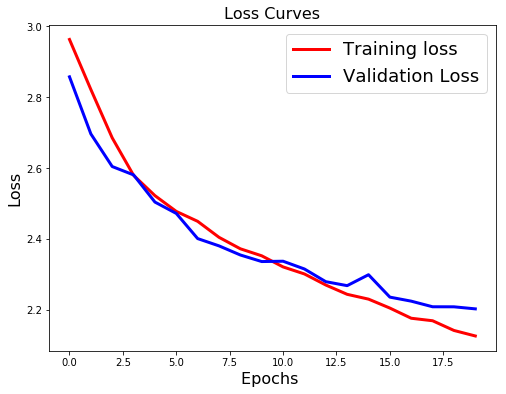

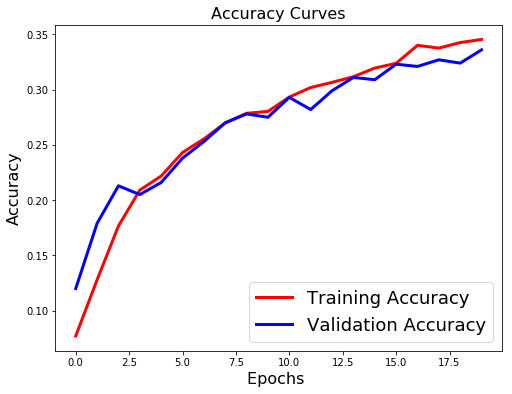

In [30]:
plotter(history)